In [1]:
import pickle
import numpy as np

In [25]:


with open('./vit_base.pkl', 'rb') as f:
    vit_slopes = pickle.load(f)

with open('./vgg16.pkl', 'rb') as f:
    vgg_slopes = pickle.load(f)
    
with open('./vit_base_layers.pkl', 'rb') as f:
    vit_layers = pickle.load(f)

with open('./vgg16_layers.pkl', 'rb') as f:
    vgg_layers = pickle.load(f)

In [26]:
vit_pair_slopes, vit_triplet_slopes = vit_slopes

vgg_pair_slopes, vgg_triplet_slopes = vgg_slopes

In [27]:
vit_active_layers, vit_active_layer_inds = vit_layers

vgg_active_layers, vgg_active_layer_inds = vgg_layers

In [11]:
reference_pair=0.5
reference_pair_name='Zoccolan et. al. 2005, pairs'
reference_triplet=0.33
reference_triplet_name='Zoccolan et. al. 2005, triplets'

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [39]:
vgg_active_layer_inds

[0,
 3,
 7,
 8,
 10,
 11,
 13,
 14,
 15,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

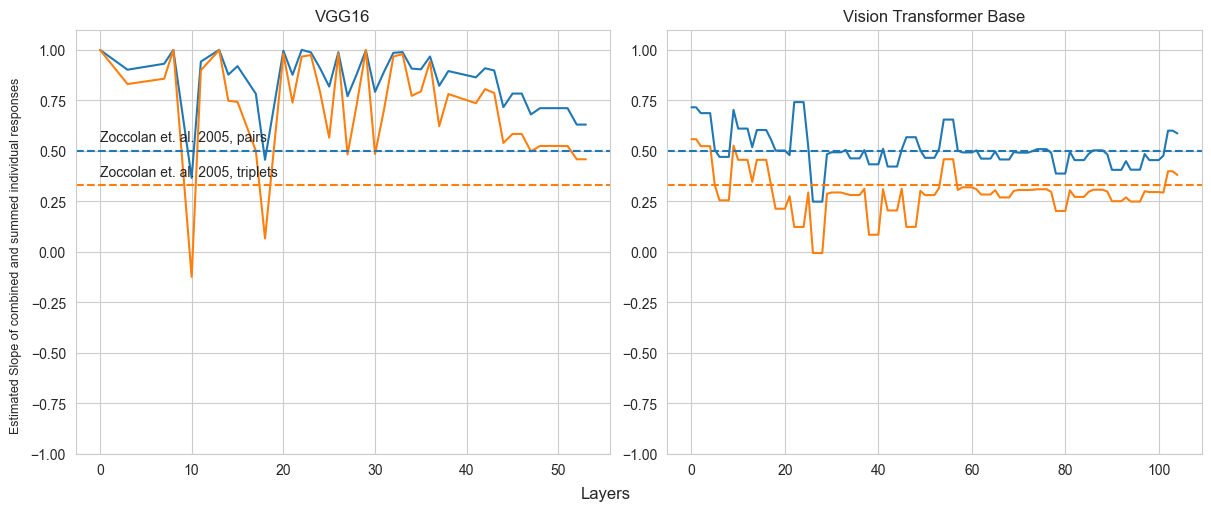

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
colors = sns.color_palette()
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 5))

ax1_layer_inds = vgg_active_layer_inds
l1 = sns.lineplot(x=ax1_layer_inds, y=vgg_pair_slopes, ax=ax1)
l2 = sns.lineplot(x=ax1_layer_inds, y=vgg_triplet_slopes, ax=ax1)
ax1.axhline(y=reference_pair, color=colors[0], linestyle='--')
ax1.text(0, reference_pair+0.1, reference_pair_name, verticalalignment='top', horizontalalignment='left')
ax1.axhline(y=reference_triplet, color=colors[1], linestyle='--')
ax1.text(0, reference_triplet+0.1, reference_triplet_name, verticalalignment='top', horizontalalignment='left')
ax1.set_ylim(-1,1.1)
ax1.set_title('VGG16')

ax2_layer_inds = vit_active_layer_inds
l3 = sns.lineplot(x=ax2_layer_inds, y=vit_pair_slopes, ax=ax2)
l4 = sns.lineplot(x=ax2_layer_inds, y=vit_triplet_slopes, ax=ax2)
ax2.axhline(y=reference_pair, color=colors[0], linestyle='--')
# ax2.text(0, reference_pair+0.1, reference_pair_name, verticalalignment='top', horizontalalignment='left')
ax2.axhline(y=reference_triplet, color=colors[1], linestyle='--')
# ax2.text(0, reference_triplet+0.1, reference_triplet_name, verticalalignment='top', horizontalalignment='left')
ax2.set_ylim(-1,1.1)
ax2.set_title('Vision Transformer Base')

fig.supxlabel('Layers')
fig.supylabel("Estimated Slope of combined and summed individual responses", fontsize=9)

plt.show()

In [37]:
len(vit_active_layer_inds)

105